<a href="https://colab.research.google.com/github/bappy15010/Brain-Tumor-Detection/blob/master/Final_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import os
import numpy
import matplotlib.pyplot as plt
import h5py
import cv2

In [ ]:
# Now Take All the ata into a list
data_dir='/content/drive/My Drive/Brain_MRI2/BRAIN_DATA'
total_image=3064
trainindata=[]
for i in range(1,total_image+1):
  filename=str(i)+".mat"
  data=h5py.File(os.path.join(data_dir,filename),"r")
  trainindata.append(data)

  if i%100==0:
    print(filename)

100.mat
200.mat
300.mat
400.mat
500.mat
600.mat
700.mat
800.mat
900.mat
1000.mat
1100.mat
1200.mat
1300.mat
1400.mat
1500.mat
1600.mat
1700.mat
1800.mat
1900.mat
2000.mat
2100.mat
2200.mat
2300.mat
2400.mat
2500.mat
2600.mat
2700.mat
2800.mat
2900.mat
3000.mat


In [ ]:
print(trainindata[5])

<HDF5 file "6.mat" (mode r)>


In [ ]:
import keras
import random
random.shuffle(trainindata)

In [ ]:
import numpy as np
 # Now take all the image as train and test
trainx=[]
trainy=[]
testx=[]
testy=[]

size=round(4*total_image/5) # Split the dataset into 80:20
# For trainx and trainy
for i in range(size):
  image=trainindata[i]["cjdata"]["image"].value
  if image.shape==(512,512):
    image=np.expand_dims(image,axis=0)
    trainx.append(image)

    label=int(trainindata[i]["cjdata"]["label"].value)-1
    trainy.append(label)
# For trainx and trainy
for i in range(size,total_image):
  image=trainindata[i]["cjdata"]["image"].value
  if image.shape==(512,512):
    image=np.expand_dims(image,axis=0)
    testx.append(image)

    label=int(trainindata[i]["cjdata"]["label"].value)-1
    testy.append(label)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.


In [ ]:
# Converting list to numpy array
trainx=np.array(trainx).reshape(-1,512,512,1)
testx=np.array(testx).reshape(-1,512,512,1)
trainy=np.array(trainy)
testy=np.array(testy)

In [ ]:
print(testy)

[1 1 1 2 0 1 1 2 1 2 0 2 2 1 1 2 0 1 1 1 1 2 2 1 0 1 2 2 2 0 1 1 2 0 1 1 1
 2 1 0 2 2 0 2 1 1 0 0 0 0 0 2 1 1 0 2 1 2 2 1 1 0 1 1 0 1 1 1 2 1 1 2 1 0
 2 2 0 1 1 0 1 1 1 0 2 0 2 1 1 0 1 2 1 1 1 2 2 2 2 2 1 0 1 1 0 2 0 1 0 2 1
 1 1 2 0 2 1 1 0 1 0 2 2 0 2 0 2 1 0 1 2 1 1 1 0 2 2 1 1 1 1 2 0 0 2 1 1 1
 1 1 2 1 1 1 1 2 1 2 1 1 0 0 1 2 2 2 1 1 1 1 2 2 2 1 1 0 1 1 0 1 0 1 1 2 0
 1 1 2 2 1 2 2 2 0 1 2 2 1 2 0 1 0 2 2 2 2 0 1 1 2 0 1 2 2 0 1 2 1 0 1 0 1
 1 0 2 1 2 2 0 1 0 2 2 0 1 1 2 1 0 2 0 2 0 1 2 0 1 0 1 0 2 2 0 0 1 2 0 2 1
 2 2 1 1 2 1 1 0 2 1 0 1 2 0 1 0 1 1 1 2 2 0 2 2 1 2 1 1 2 2 2 1 2 0 1 1 1
 1 1 2 1 1 0 1 0 1 2 0 0 2 1 2 1 1 1 0 0 0 2 0 1 0 1 2 2 2 1 2 2 1 2 0 0 0
 1 0 1 0 0 2 0 1 0 2 0 1 1 1 2 2 1 1 2 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 2 1
 1 0 2 0 2 2 2 2 2 1 1 1 0 0 1 1 2 0 2 1 2 2 1 2 1 1 2 1 2 2 1 0 0 1 1 1 1
 2 2 2 1 1 0 0 0 1 2 0 2 0 1 1 1 2 1 2 0 2 0 1 0 1 0 2 2 2 0 1 0 1 2 1 1 1
 1 0 1 2 1 0 2 1 0 1 2 2 2 2 2 0 1 2 1 0 1 2 1 0 0 2 2 2 1 1 2 1 2 2 1 0 0
 1 1 0 1 2 0 1 0 1 2 2 0 

In [ ]:
print(trainy)

[0 2 1 ... 1 2 2]


In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(2439, 512, 512, 1)
(610, 512, 512, 1)
(2439,)
(610,)


In [ ]:
print(testx)

[[[[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  ...

  [[ 8]
   [ 7]
   [ 8]
   ...
   [22]
   [15]
   [ 7]]

  [[ 6]
   [ 7]
   [ 7]
   ...
   [18]
   [14]
   [ 5]]

  [[ 6]
   [ 8]
   [ 8]
   ...
   [15]
   [12]
   [ 6]]]


 [[[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  ...

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]]


 [[[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  ...

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0

In [ ]:
#Model building starts
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
tf.keras.backend.clear_session()

In [ ]:
#Initial  BLock of the model
ini_input=keras.Input(shape=(512,512,1),name="image")

x1=layers.Conv2D(64,(22,22),strides=2)(ini_input)
x1=layers.MaxPooling2D((4,4))(x1)
x1=layers.BatchNormalization()(x1)

x2=layers.Conv2D(128,(11,11),strides=2,padding="same")(x1)
x2=layers.MaxPooling2D((2,2))(x2)
x2=layers.BatchNormalization()(x2)

x3=layers.Conv2D(256,(7,7),strides=2,padding="same")(x2)
x3=layers.MaxPooling2D((2,2))(x3)
x3=layers.BatchNormalization()(x3)

x4=layers.Conv2D(512,(3,3),strides=2,padding="same")(x3)
x4=layers.MaxPooling2D((2,2))(x4)
x4=layers.BatchNormalization()(x4)

x5=layers.GlobalAveragePooling2D()(x4)
x5=layers.Activation("relu")(x5)

x6=layers.Dense(1024,"relu")(x5)
x6=layers.BatchNormalization()(x6)
x7=layers.Dense(512,"relu")(x6)
x7=layers.BatchNormalization()(x7)
x8=layers.Dense(256,"relu")(x7)
x8=layers.BatchNormalization()(x8)
x8=layers.Dropout(.2)(x8)
x9=layers.Dense(3)(x8)
pred=layers.Activation("softmax")(x9)

model=keras.Model(inputs=ini_input,outputs=pred)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, 512, 512, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 246, 246, 64)      31040     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 61, 61, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 31, 128)       991360    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 128)      

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
r=model.fit(trainx,
          trainy,
          epochs=80,
          batch_size=32,
          verbose=1,
          validation_data=(testx,testy),
          shuffle=False
          )

Epoch 1/80
77/77 [==============================] - 11s 143ms/step - loss: 0.8081 - accuracy: 0.6786 - val_loss: 1.3961 - val_accuracy: 0.5033
Epoch 2/80
77/77 [==============================] - 11s 137ms/step - loss: 0.5474 - accuracy: 0.7675 - val_loss: 1.0234 - val_accuracy: 0.5164
Epoch 3/80
77/77 [==============================] - 10s 133ms/step - loss: 0.4412 - accuracy: 0.8171 - val_loss: 7.2096 - val_accuracy: 0.4492
Epoch 4/80
77/77 [==============================] - 10s 132ms/step - loss: 0.3608 - accuracy: 0.8491 - val_loss: 1.8431 - val_accuracy: 0.4984
Epoch 5/80
77/77 [==============================] - 10s 130ms/step - loss: 0.3225 - accuracy: 0.8795 - val_loss: 1.6299 - val_accuracy: 0.4705
Epoch 6/80
77/77 [==============================] - 10s 130ms/step - loss: 0.2402 - accuracy: 0.9069 - val_loss: 1.0945 - val_accuracy: 0.6672
Epoch 7/80
77/77 [==============================] - 10s 130ms/step - loss: 0.2301 - accuracy: 0.9127 - val_loss: 3.5175 - val_accuracy: 0.4344

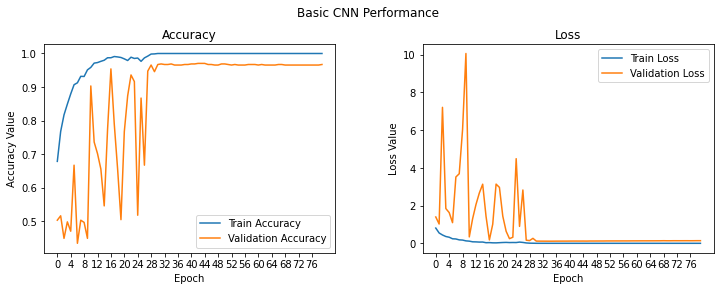

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,80))
ax1.plot(epoch_list, r.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, r.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 80, 4))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, r.history['loss'], label='Train Loss')
ax2.plot(epoch_list, r.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 80, 4))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
pred=model.predict(testx)
Y_pred = np.argmax(pred, 1)

In [ ]:
Y_pred.shape

(610,)

In [ ]:
testy.shape

(610,)

In [ ]:
Y_pred

array([1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 2,
       2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2,
       1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 2, 1, 1, 2, 0, 0, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 2, 1,
       1, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2,
       1, 1, 1, 2, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 2, 0, 2, 1, 0, 1, 2, 1,
       1, 1, 0, 2, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 1,
       2, 1, 1, 0, 2, 2, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 0, 1,
       0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0, 2, 0, 2,
       1, 0, 2, 0, 1, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0, 2, 1, 2, 2, 1, 1, 2,
       1, 1, 0, 2, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 1,
       1, 2, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1,

In [ ]:
testy

array([1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 2,
       2, 1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2,
       1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 2, 1, 1, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 2, 1,
       1, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2,
       1, 1, 1, 2, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 2, 0, 2, 1, 0, 1, 2, 1,
       1, 1, 0, 2, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 1,
       2, 0, 1, 0, 2, 2, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 0, 1,
       0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0, 2, 0, 2,
       0, 1, 2, 0, 1, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0, 2, 1, 2, 2, 1, 1, 2,
       1, 1, 0, 2, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 1,
       1, 2, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(testy, Y_pred))

Confusion Matrix
[[140   9   1]
 [  8 266   0]
 [  2   0 184]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


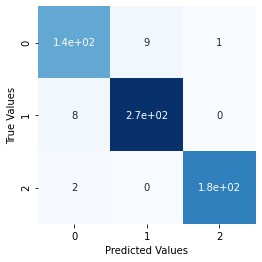

In [ ]:
import seaborn as sns
cm=confusion_matrix(testy, Y_pred)
sns.heatmap(cm, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');

In [ ]:
print('Classification Report')
target_names = ['Meningioma', 'Glioma', 'Pituitary']
print(classification_report(testy, Y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

  Meningioma       0.93      0.93      0.93       150
      Glioma       0.97      0.97      0.97       274
   Pituitary       0.99      0.99      0.99       186

    accuracy                           0.97       610
   macro avg       0.97      0.96      0.96       610
weighted avg       0.97      0.97      0.97       610



In [ ]:
print(trainy)

[0 2 1 ... 1 2 2]


[Text(0, 0.5, 'Meningioma'), Text(0, 1.5, 'Glioma'), Text(0, 2.5, 'Pituitary')]

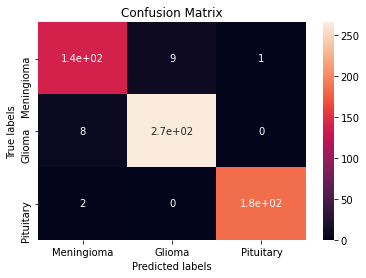

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Meningioma', 'Glioma', 'Pituitary']); ax.yaxis.set_ticklabels(['Meningioma', 'Glioma', 'Pituitary'])

Confusion Matrix :
[[140   9   1]
 [  8 266   0]
 [  2   0 184]]
Accuracy Score : 0.9672131147540983
Report : 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       150
           1       0.97      0.97      0.97       274
           2       0.99      0.99      0.99       186

    accuracy                           0.97       610
   macro avg       0.97      0.96      0.96       610
weighted avg       0.97      0.97      0.97       610



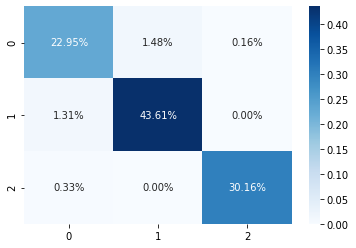

In [ ]:
from sklearn.metrics import accuracy_score
results = confusion_matrix(testy,Y_pred) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(testy,Y_pred)) 
print('Report : ')
print(classification_report(testy,Y_pred))

sns.heatmap(results/np.sum(results), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(testy, Y_pred, pos_label=2)
metrics.auc(fpr, tpr)

0.9899573950091296

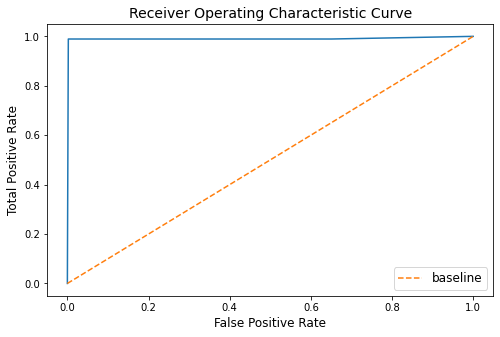

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(fpr, tpr)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=14)
plt.ylabel('Total Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(fontsize=12);

In [ ]:
model.save('/content/drive/My Drive/Brain_MRI2/my_model.h5')

In [ ]:
model.save_weights('/content/drive/My Drive/Brain_MRI2/my_weight')